El conjunto de datos “Mall Customers” incluye las siguientes características:

    Customer ID: Un identificador único para cada cliente.

    Gender: El género del cliente: Male, Female

    Age: La edad del cliente.

    Annual income (K$): El ingreso anual aproximado del cliente, expresado en miles de dólares.
    
    Spending Score (1-100): El scoring asignado por el centro comercial en función del comportamiento del cliente y la naturaleza del gasto. Este puntaje o scoring esta en el rango de 1 a 100.

In [1]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Segmentacion de clientes/Mall_Customers.csv')
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


Nos centraremos en Annual income (K$)y Spending Score (1-100).Para ello, seleccionamos dichas columnas del dataset y las convertimos en un ndarray de NumPy, luego, asociamos este resultado a X, siendo esta la famosa matriz de características.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = dataset.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Al visualizar estas dos variables en un gráfico de dispersión, obtenemos una primera impresión de la distribución de los clientes.

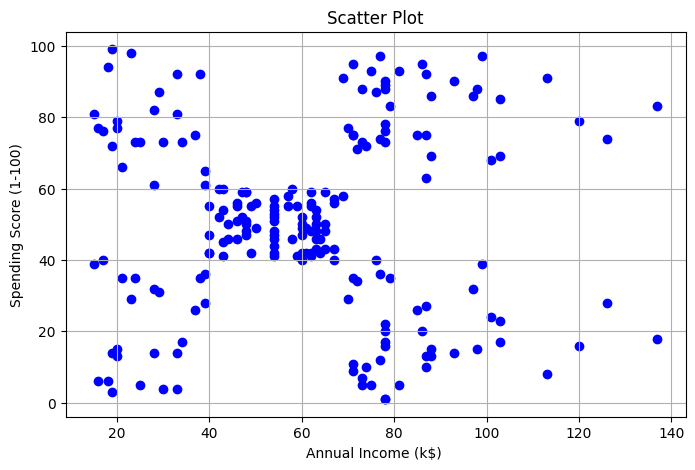

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], color='blue', marker='o')
plt.title('Scatter Plot')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

¿Existen patrones o agrupaciones naturales?
Para abordar este pregunta, necesitamos identificar si los clientes de Green Meadows se agrupan por características comunes como: ingresos y puntuaciones de gasto. Esto permitirá comprender la naturaleza específica de los diferentes clústers dentro del conjunto de datos.

K-means, es un algoritmo tremendamente útil para los negocios, gracias a su capacidad de interpretar fácilmente los datos y proporcionar información práctica y relevante. Este método ayuda a las empresas a identificar tendencias ocultas en los datos de clientes, a afinar sus estrategias de marketing y ventas, y a tomar decisiones más informadas y precisas.

In [9]:
from sklearn.cluster import KMeans

wcss = []
n_clu = 10

for i in range(1, n_clu+1):

    kmeans = KMeans(n_clusters = i,
                    init = "k-means++",
                    max_iter = 300,
                    n_init = 10,
                    random_state = 42)

    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

    print(wcss)

[269981.28000000014]
[269981.28000000014, 181363.59595959607]
[269981.28000000014, 181363.59595959607, 106348.37306211119]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977, 21916.79478984372]
[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451

Como se puede ver en el la lista, los valores de WCSS tienden a disminuir progresivamente a medida que aumenta el número de clústeres. Esta disminución es típicamente rápida al principio y se ralentiza a medida que se alcanza el número óptimo de clústeres.

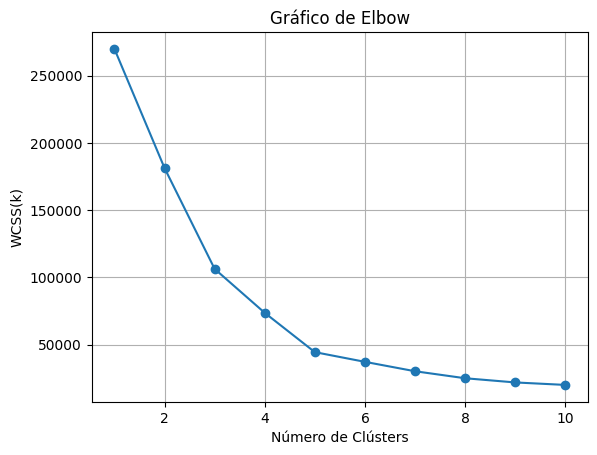

In [10]:
plt.plot(range(1,11), wcss, marker='o')
plt.title("Gráfico de Elbow")
plt.xlabel("Número de Clústers")
plt.ylabel("WCSS(k)")
plt.grid(True)
plt.show()

Teniendo ya el K-óptimo, lo que vamos hacer es organizar nuestro dataset X en 5 grupos o clústeres distintos.

La idea, es volver a ejecutar el método K-means con K=5 para que el algoritmo encuentre las mejores 5 agrupaciones basándonos en las características de los datos.

In [11]:
kmeans = KMeans(n_clusters = 5,
                init="k-means++",
                max_iter = 100,
                n_init = 10,
                random_state = 42)

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Si mostramos las 10 primers perdiciones de clústeres tenemos lo siguiente:

In [12]:
y_kmeans[0:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

Tras ajustar el modelo K — Means a nuestros datos y asignar cada muestra a un clúster, ahora debemos integrar los resultados en nuestro conjunto de datos original para facilitar un análisis más detallado y poder dar ese valor añadido a negocio.

In [13]:
y_kmeans_series = pd.Series(y_kmeans, name='Cluster Pred')

X_clustered = pd.concat([dataset, y_kmeans_series], axis=1)
X_clustered

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Pred
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Tras integrar las asignaciones de clúster (Cluster Pred) en nuestro conjunto de datos, el siguiente paso consiste en visualizar los resultados para obtener una comprensión intuitiva de cómo se distribuyen los clústeres en función de las características seleccionadas.

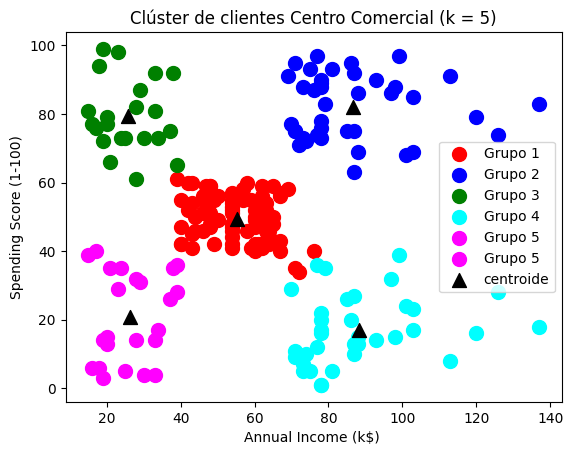

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
              s = 100, c = "red", label = "Grupo 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
              s = 100, c = "blue", label = "Grupo 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100,
              c = "green", label = "Grupo 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100,
              c = "cyan", label = "Grupo 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100,
              c = "magenta", label = "Grupo 5")
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100,
              c = "magenta", label = "Grupo 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
              s = 100, c = "black", label = "centroide", marker = '^')
n = '5'
plt.title('Clúster de clientes Centro Comercial (k = ' + str(n) +')')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cada punto en el gráfico corresponde a una muestra en el conjunto de datos X, coloreada de acuerdo con el clúster al que pertenece. Los colores distintos (rojo, azul, verde, cian y magenta) facilitan la diferenciación visual entre los grupos 1, 2, 3, 4 y 5 respectivamente.